In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Airbnb_Open_Data.csv', low_memory=False)

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13185 entries, 0 to 13184
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13185 non-null  int64  
 1   NAME                            13116 non-null  object 
 2   host id                         13185 non-null  int64  
 3   host_identity_verified          13090 non-null  object 
 4   host name                       13157 non-null  object 
 5   neighbourhood group             13158 non-null  object 
 6   neighbourhood                   13169 non-null  object 
 7   lat                             13177 non-null  float64
 8   long                            13177 non-null  float64
 9   country                         13135 non-null  object 
 10  country code                    13106 non-null  object 
 11  instant_bookable                13106 non-null  object 
 12  cancellation_policy             

In [7]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
df.duplicated().value_counts()

,count
False,13185


In [9]:
# Neighbourhood group was 'brookln' instead of 'brooklyn'
df[df["neighbourhood group"] == "brooklin"]


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [10]:
df["neighbourhood group"] = df["neighbourhood group"].replace("brooklin", "brooklyn")

In [11]:
df["neighbourhood group"].value_counts()

,count
neighbourhood group,
Manhattan,6138
Brooklyn,5807
Queens,990
Bronx,158
Staten Island,63
brookln,1
manhatan,1


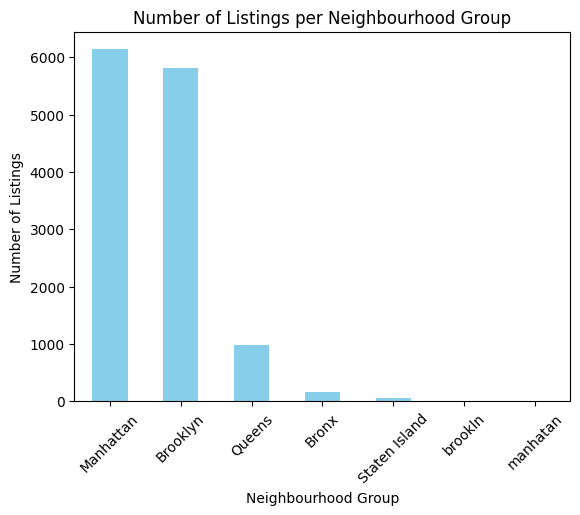

In [12]:
df["neighbourhood group"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Listings per Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()


In [25]:
#Drop duplicate records
df.drop_duplicates(inplace=True)

#Drop house_rules and license columns with insufficient data
cols_to_drop = ['house_rules', 'license']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['service fee '] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

#Remove all commas in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).astype(float)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).astype(float)

# Rename the price and service fee columns to include a dollar sign
df.rename(columns={
    'price': 'price',
    'service fee': 'service fee'
}, inplace=True)

#Drop all records with missing values
df.dropna(inplace=True)

#Change all mismatched data types to the appropriate once.
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

#Correct the spelling of 'brookln' to 'Brooklyn'
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn')

# Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 365].index)




/tmp/ipython-input-3155104204.py:31: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'])


In [14]:
df.duplicated().value_counts()

,count
False,13185


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13185 entries, 0 to 13184
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13185 non-null  int64  
 1   NAME                            13116 non-null  object 
 2   host id                         13185 non-null  int64  
 3   host_identity_verified          13090 non-null  object 
 4   host name                       13157 non-null  object 
 5   neighbourhood group             13158 non-null  object 
 6   neighbourhood                   13169 non-null  object 
 7   lat                             13177 non-null  float64
 8   long                            13177 non-null  float64
 9   country                         13135 non-null  object 
 10  country code                    13106 non-null  object 
 11  instant_bookable                13106 non-null  object 
 12  cancellation_policy             

In [16]:
df.columns.tolist()

['id',
 'NAME',
 'host id',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year',
 'price',
 'service fee',
 'minimum nights',
 'number of reviews',
 'last review',
 'reviews per month',
 'review rate number',
 'calculated host listings count',
 'availability 365']

In [17]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.318500e+04,1.318500e+04,13177.000000,13177.000000,13042.000000,13025.000000,13170.000000,11132.000000,13081.000000,13161.000000,13036.000000
mean,4.642098e+06,4.892300e+10,40.729353,-73.958871,2012.445944,8.134127,40.798633,0.863691,3.005504,2.889750,207.915388
std,2.102234e+06,2.854951e+10,0.051992,0.036007,5.776811,40.813376,65.358884,1.178470,1.416094,9.625333,125.989979
min,1.001254e+06,1.303496e+08,40.508680,-74.239860,2003.000000,-12.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.821717e+06,2.422289e+10,40.689250,-73.983710,2007.000000,2.000000,2.000000,0.100000,2.000000,1.000000,98.000000
50%,4.642098e+06,4.840692e+10,40.722930,-73.958920,2012.000000,3.000000,11.000000,0.330000,3.000000,1.000000,210.000000
75%,6.462478e+06,7.378123e+10,40.763850,-73.942840,2017.000000,5.000000,51.750000,1.190000,4.000000,2.000000,317.000000
max,8.282859e+06,9.873673e+10,40.908040,-73.712990,2022.000000,3455.000000,629.000000,14.580000,5.000000,121.000000,426.000000


In [18]:
# what are the different types in the Dataset?
property_type = df['room type'].value_counts().to_frame()
property_type

,count
room type,
Entire home/apt,7580
Private room,5421
Shared room,184


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

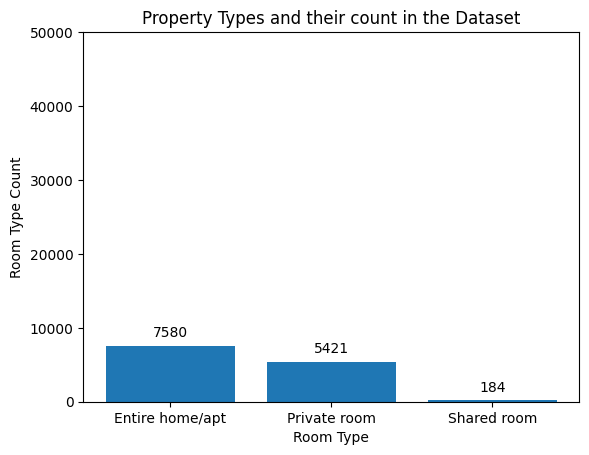

In [19]:
# Room type count plotted on a barchart
room_type_bar = plt.bar(property_type.index, property_type.loc[:, "count"])
plt.bar_label(room_type_bar, labels=property_type.loc[:, "count"], padding=4)
plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')

In [20]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,6138
Brooklyn,5807
Queens,990
Bronx,158
Staten Island,63
brookln,1
manhatan,1


Text(0.5, 1.0, 'Which Neighborhood Groups has the highest number of Listings')

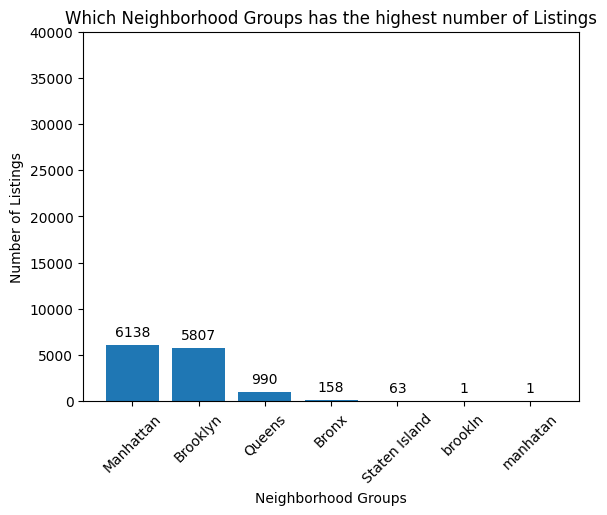

In [21]:
# Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"])
plt.bar_label(hood_group_bar, labels=hood_group.loc[:, "count"], padding=4)
plt.ylim([0, 40000])
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Which Neighborhood Groups has the highest number of Listings')

Text(0.5, 1.0, 'Average Price per Listings ($) in each Neighborhood Group')

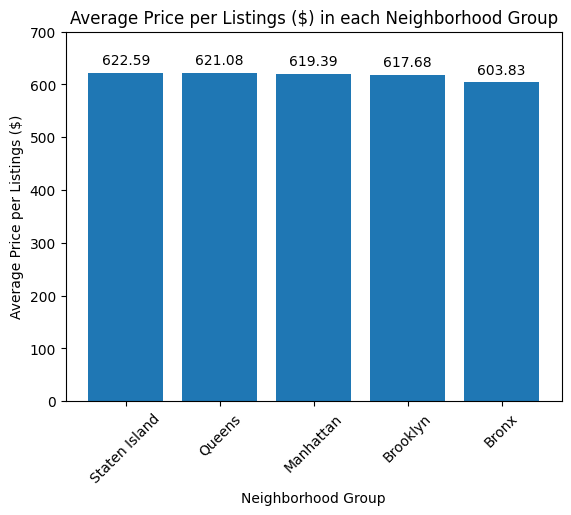

In [27]:
# Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price'])
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, 'price'], 2), label_type='edge', padding=4)
plt.ylim([0, 700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listings ($) in each Neighborhood Group')

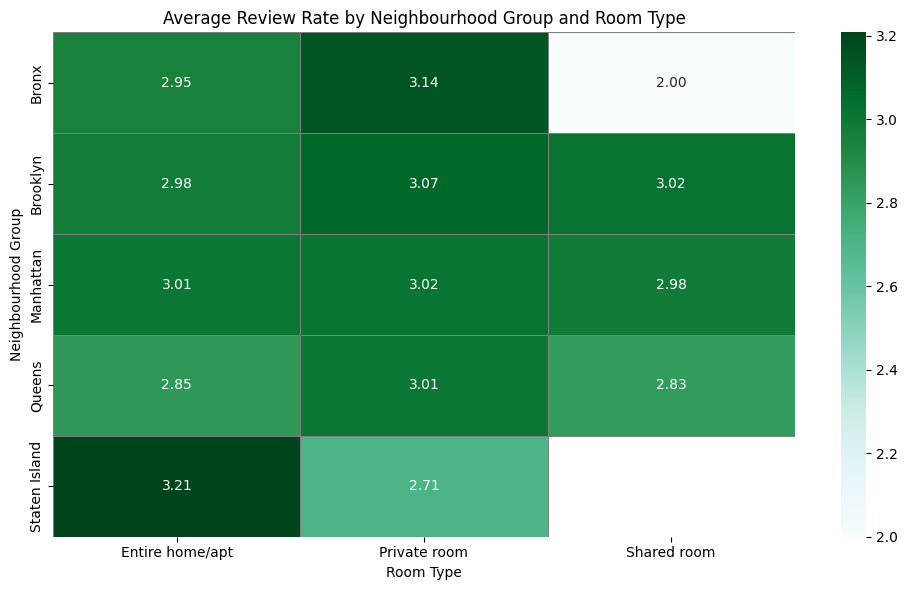

In [28]:
# Average Review Rate by Neighbourhood Group and Room Type
heatmap_data = df.pivot_table(values='review rate number', index='neighbourhood group', columns='room type', aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Average Review Rate by Neighbourhood Group and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()


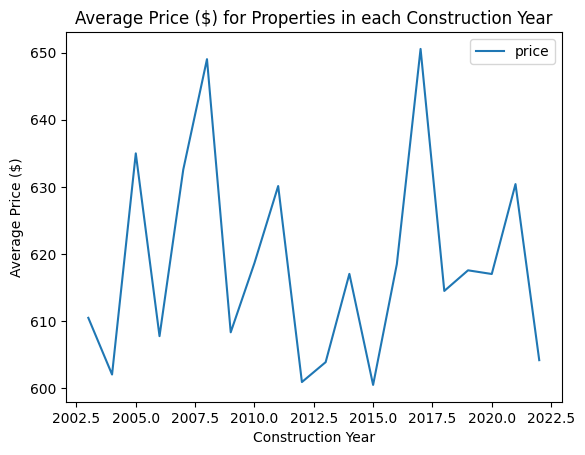

In [30]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

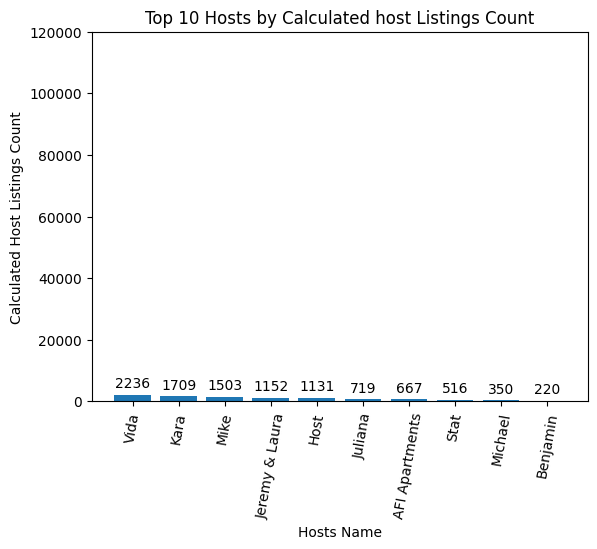

In [31]:
#Who are the top 10 hosts by calculated host listings count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

In [32]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.011263
verified,3.005981


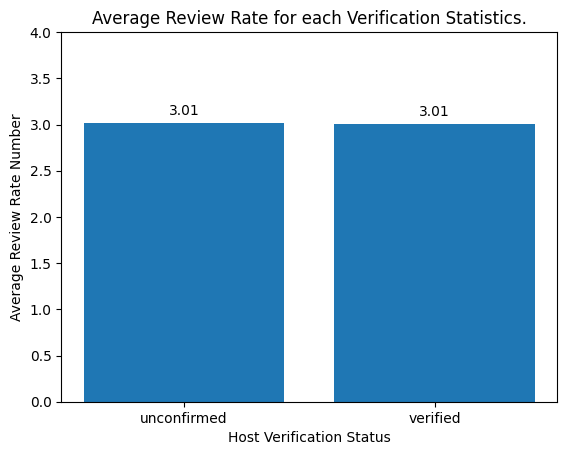

In [33]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

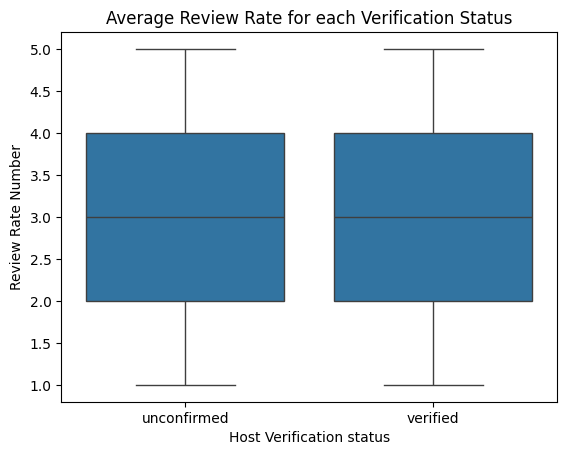

In [34]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

In [36]:
#Is there a correlation between the price of a listing and its service fee?
df['price'].corr(df['service fee'])

np.float64(0.9999911862758744)

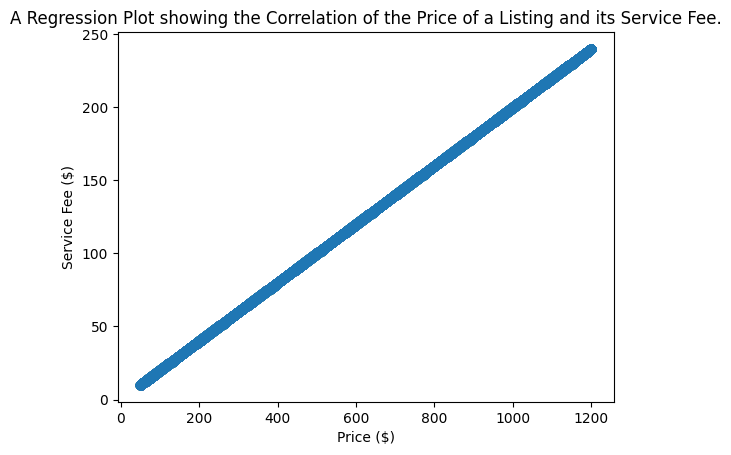

In [ ]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [37]:
#What is the average review rate number (e.g, stars) for listings, and does it vary based on the neighbourhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            2.951220
                    Private room               3.139241
                    Shared room                2.000000
Brooklyn            Entire home/apt            2.979476
                    Private room               3.068208
                    Shared room                3.025000
Manhattan           Entire home/apt            3.008846
                    Private room               3.017301
                    Shared room                2.983333
Queens              Entire home/apt            2.848875
                    Private room               3.007712
                    Shared room                2.833333
Staten Island       Entire home/apt            3.208333
                    Private room               2.705882

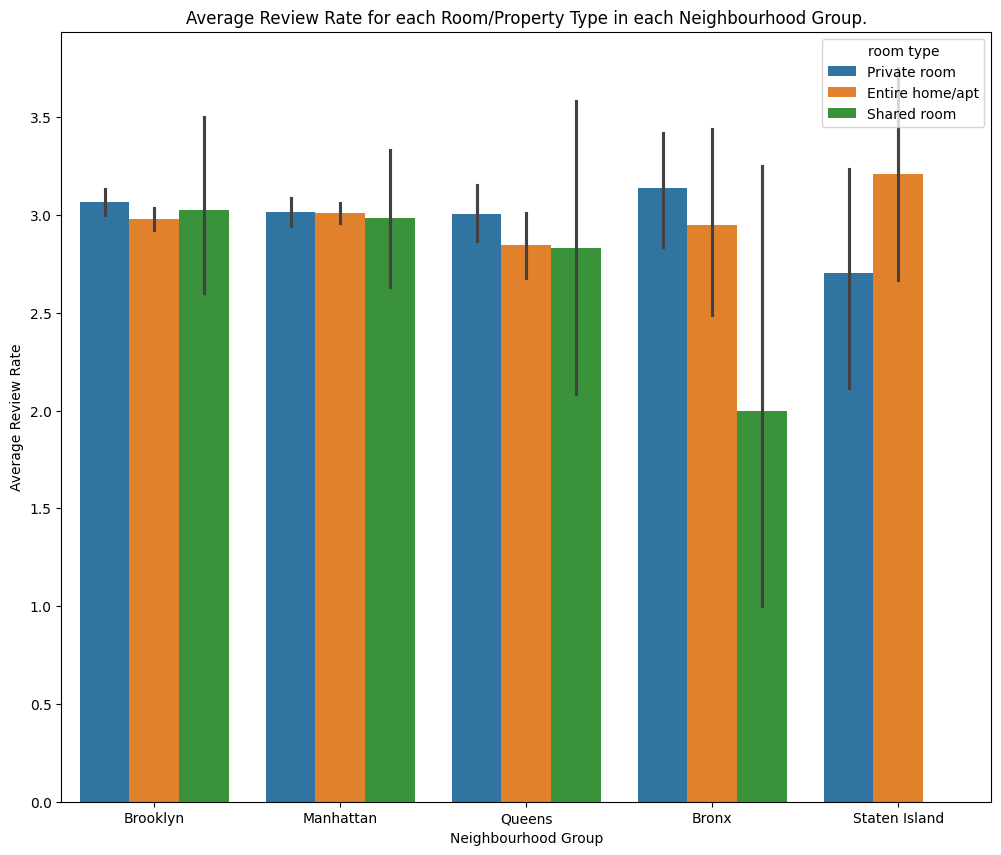

In [38]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type' );
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

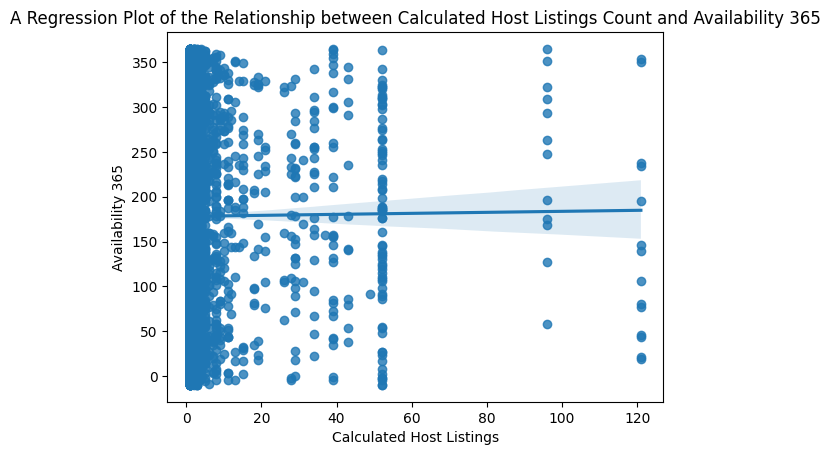

In [39]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [40]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.004298343042645439)